In [8]:
library(tidyverse)
install.packages("pls")
load("~/Google 云端硬盘/628 Module1/new_train.Rdata")
load("~/Google 云端硬盘/628 Module1/test.Rdata")
data<-new_train

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
model<-lm(BODYFAT~.,data = data)

Model 1 simple linear regression

In [3]:
y<-predict.lm(model,test[,-1])  #MSE=0.2901688
cor.test(y,test[,1])


	Pearson's product-moment correlation

data:  y and test[, 1]
t = 81.656, df = 49, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9935743 0.9979230
sample estimates:
      cor 
0.9963457 


In [6]:
#Model 2
X <- model.matrix(model)[,-1]
Y <- data[,1]
#Mallow’s Cp is a criteria based on the Model Error.
library(leaps) # for leaps()
library(faraway) # for Cpplot()
g <- leaps(X, Y, nbest = 1)
Cpplot(g)
#Don't have a better result

ERROR: Error in library(leaps): there is no package called ‘leaps’



Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



, , 14 comps

              BODYFAT
DENSITY   -7.42438169
AGE        0.20621063
WEIGHT     0.96561847
HEIGHT    -0.27705053
ADIPOSITY -0.33231612
NECK      -0.05676845
CHEST      0.20608203
ABDOMEN    0.11588975
HIP        0.16379669
THIGH     -0.03923062
KNEE      -0.16197669
ANKLE     -0.12633943
BICEPS    -0.20435470
FOREARM    0.05177177
WRIST      0.01426433


	Pearson's product-moment correlation

data:  y and test[, 1]
t = 81.637, df = 49, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9935714 0.9979221
sample estimates:
     cor 
0.996344 


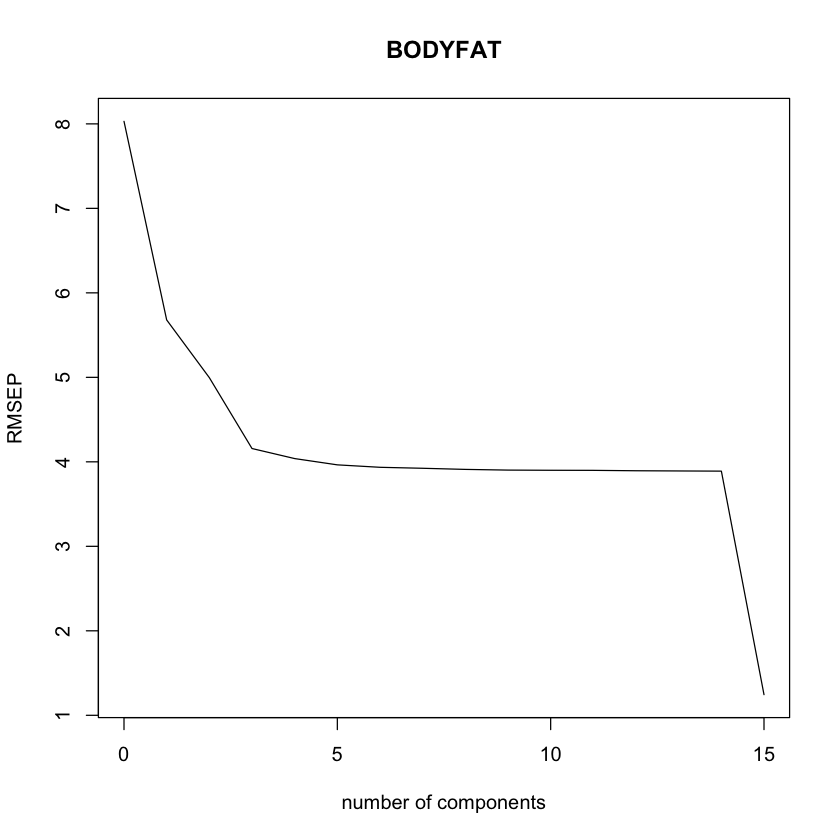

In [9]:
#Model 3 PLS
library("pls")
pls1<-plsr(BODYFAT~.,data=data)
validationplot(pls1)
#choose first 14 components
pls2<-plsr(BODYFAT~.,data=data,ncomp=14,method = "oscorespls",scale=T)
coef(pls2)
y<-predict(pls2,test[,-1])[,,14]   #MSE=0.291165
cor.test(y,test[,1])

In [10]:
#Model 4
model.AIC <- step(model, k=2, direction = "both")
#BODYFAT ~ DENSITY + AGE + ABDOMEN
m1<-lm(BODYFAT ~ DENSITY + AGE + ABDOMEN,data = data)
y<-predict(m1,test[,-1])  #MSE=0.2168101

model.BIC <- step(model, k=log(250))
#BODYFAT ~ DENSITY + CHEST
m2<-lm(BODYFAT ~ DENSITY + CHEST,data = data)
y<-predict(m2,test[,-1])  #MSE=0.2366082

base <- lm(BODYFAT~1,data=data)
AIC.base <- step(base,direction="both", scope=list(lower=~1,upper=model),trace=T)
#same as m1

Start:  AIC=118.97
BODYFAT ~ DENSITY + AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq     RSS    AIC
- WRIST      1      0.02  308.09 116.98
- THIGH      1      0.06  308.13 117.01
- NECK       1      0.16  308.23 117.07
- ABDOMEN    1      0.16  308.24 117.07
- FOREARM    1      0.19  308.26 117.09
- ADIPOSITY  1      0.33  308.40 117.18
- HIP        1      0.49  308.57 117.29
- HEIGHT     1      0.60  308.68 117.36
- CHEST      1      0.88  308.95 117.54
- KNEE       1      1.06  309.13 117.65
- WEIGHT     1      1.71  309.78 118.07
- ANKLE      1      1.81  309.88 118.13
- BICEPS     1      2.47  310.54 118.56
<none>                    308.07 118.97
- AGE        1      3.52  311.59 119.23
- DENSITY    1   2720.81 3028.88 571.81

Step:  AIC=116.98
BODYFAT ~ DENSITY + AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM

   

Start:  AIC=175.31
BODYFAT ~ DENSITY + AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq     RSS    AIC
- WRIST      1      0.02  308.09 169.80
- THIGH      1      0.06  308.13 169.83
- NECK       1      0.16  308.23 169.89
- ABDOMEN    1      0.16  308.24 169.90
- FOREARM    1      0.19  308.26 169.91
- ADIPOSITY  1      0.33  308.40 170.00
- HIP        1      0.49  308.57 170.11
- HEIGHT     1      0.60  308.68 170.18
- CHEST      1      0.88  308.95 170.36
- KNEE       1      1.06  309.13 170.47
- WEIGHT     1      1.71  309.78 170.89
- ANKLE      1      1.81  309.88 170.95
- BICEPS     1      2.47  310.54 171.38
- AGE        1      3.52  311.59 172.05
<none>                    308.07 175.31
- DENSITY    1   2720.81 3028.88 624.63

Step:  AIC=169.8
BODYFAT ~ DENSITY + AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM

    

From previous data view, we have strong evidence that bodyfat has more linear correlation with 1/density rather than density. Thus we do linear regression based on 1/density.

In [11]:
#Repeat the models above with 1/density
newdata<-data
newtest<-test
newdata[,2]<-1/data[,2]
newtest[,2]<-1/test[,2]

In [12]:
#Model 1 simple linear regression
model<-lm(BODYFAT~.,data = newdata)
y<-predict.lm(model,newtest[,-1])  #MSE=0.2244723

In [13]:
#Model 2
X <- model.matrix(model)[,-1]
Y <- newdata[,1]
g <- leaps(X, Y, nbest = 1)
Cpplot(g)
#No good result

ERROR: Error in leaps(X, Y, nbest = 1): 没有"leaps"这个函数


, , 14 comps

              BODYFAT
DENSITY    7.52229120
AGE        0.21338347
WEIGHT     1.01715975
HEIGHT    -0.34496163
ADIPOSITY -0.61646755
NECK      -0.04992722
CHEST      0.26912151
ABDOMEN    0.07333627
HIP        0.12993274
THIGH      0.06512083
KNEE      -0.12499173
ANKLE     -0.12314571
BICEPS    -0.18441662
FOREARM    0.05211937
WRIST      0.04832948

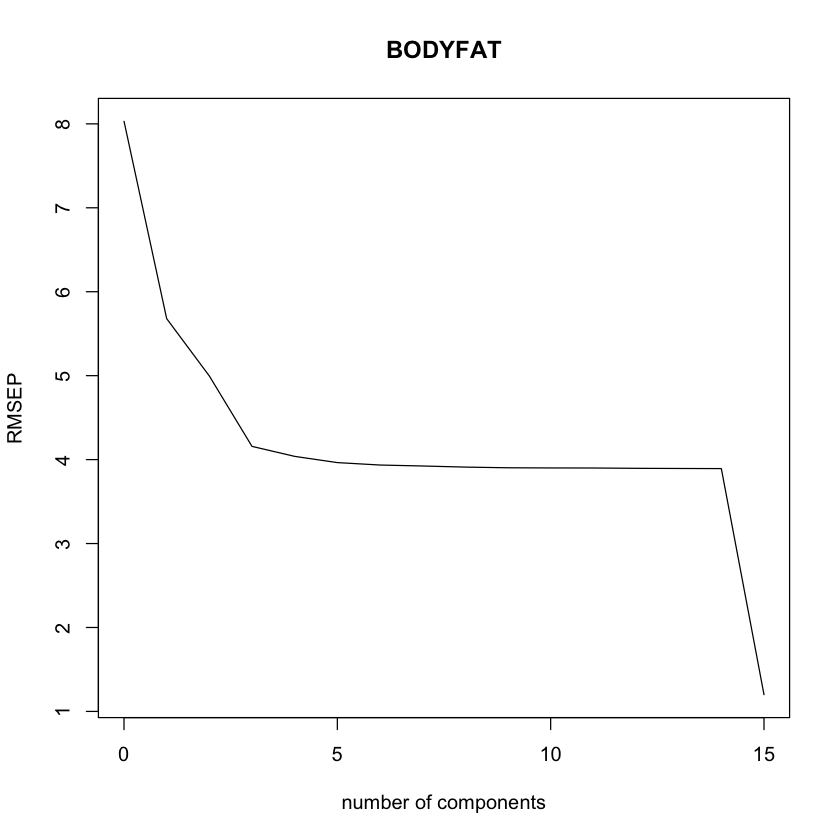

In [14]:
#Model 3 PLS
pls1<-plsr(BODYFAT~.,data=newdata)
validationplot(pls1)
pls2<-plsr(BODYFAT~.,data=newdata,ncomp=14,method = "oscorespls",scale=T)
coef(pls2)
y<-predict(pls2,newtest[,-1])[,,14]   #MSE=0.2249295

In [15]:
#Model 4
model.AIC <- step(model, k=2, direction = "both")
#BODYFAT ~ 1/DENSITY + AGE + WEIGHT + ANKLE
m1<-lm(BODYFAT ~ DENSITY + AGE + WEIGHT + ANKLE,data = newdata)
y<-predict(m1,newtest[,-1])  #MSE=0.2022335

model.BIC <- step(model, k=log(250))
#BODYFAT ~ 1/DENSITY + AGE + WEIGHT
m2<-lm(BODYFAT ~ DENSITY + AGE + WEIGHT,data = newdata)
y<-predict(m2,newtest[,-1])  #MSE=0.2014691

base <- lm(BODYFAT~1,data=newdata)
AIC.base <- step(base,direction="both", scope=list(lower=~1,upper=model),trace=T)
#BODYFAT ~ 1/DENSITY + ABDOMEN + AGE
m3<-lm(BODYFAT ~ DENSITY + ABDOMEN + AGE,data = newdata)
y<-predict(m3,newtest[,-1]) #MSE=0.175318

Start:  AIC=104.41
BODYFAT ~ DENSITY + AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq     RSS    AIC
- ABDOMEN    1      0.06  286.40 102.45
- NECK       1      0.11  286.45 102.49
- THIGH      1      0.12  286.46 102.49
- WRIST      1      0.14  286.48 102.51
- FOREARM    1      0.18  286.52 102.53
- HIP        1      0.27  286.61 102.60
- KNEE       1      0.63  286.97 102.85
- HEIGHT     1      0.87  287.21 103.02
- ADIPOSITY  1      0.99  287.33 103.10
- CHEST      1      1.40  287.74 103.38
- ANKLE      1      1.73  288.07 103.61
- WEIGHT     1      1.90  288.24 103.73
- BICEPS     1      2.04  288.38 103.83
<none>                    286.34 104.41
- AGE        1      3.90  290.24 105.10
- DENSITY    1   2742.54 3028.88 571.81

Step:  AIC=102.45
BODYFAT ~ DENSITY + AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

     

Start:  AIC=160.76
BODYFAT ~ DENSITY + AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq     RSS    AIC
- ABDOMEN    1      0.06  286.40 155.28
- NECK       1      0.11  286.45 155.31
- THIGH      1      0.12  286.46 155.31
- WRIST      1      0.14  286.48 155.33
- FOREARM    1      0.18  286.52 155.36
- HIP        1      0.27  286.61 155.42
- KNEE       1      0.63  286.97 155.67
- HEIGHT     1      0.87  287.21 155.84
- ADIPOSITY  1      0.99  287.33 155.92
- CHEST      1      1.40  287.74 156.21
- ANKLE      1      1.73  288.07 156.43
- WEIGHT     1      1.90  288.24 156.55
- BICEPS     1      2.04  288.38 156.65
- AGE        1      3.90  290.24 157.92
<none>                    286.34 160.76
- DENSITY    1   2742.54 3028.88 624.63

Step:  AIC=155.28
BODYFAT ~ DENSITY + AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

     

The final model I choose is: $bodyfat=-0.03811+0.04158/density+0.05998*abdomen+0.0136*age$